### Importing Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the dataset

In [91]:
data = pd.read_csv(r"F:\Analytix Lab\Datasets\Zomato_Bengaluru\zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [92]:
data.shape

(51717, 17)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [94]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [95]:
data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [96]:
### Dropping some columns (Phone and Menuitem)

data = data.drop(columns=['menu_item','phone'])
data.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [97]:
## Renaming Column names 'listed_in(type)' to 'rest_type', 'listed_in(city)' to 'rest_city'

data.rename(columns={'listed_in(type)':'rest_listed_type', 'listed_in(city)':'rest_city','approx_cost(for two people)':'cost_for_2' }, inplace=True)
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost_for_2',
       'reviews_list', 'rest_listed_type', 'rest_city'],
      dtype='object')

In [98]:
## Filling NA values in 'Dish_liked' and 'rate' with unknown

data.dish_liked.fillna('unknown', inplace=True)
data.rate.fillna('unknown', inplace=True)

In [99]:
# Dropping remaining NA records

data = data.dropna(ignore_index=True)
data.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_2,reviews_list,rest_listed_type,rest_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [100]:
## Checking for still any null values

print('Shape of Dataframe after null values treatment',data.shape)
data.isna().sum()

Shape of Dataframe after null values treatment (51148, 15)


url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked          0
cuisines            0
cost_for_2          0
reviews_list        0
rest_listed_type    0
rest_city           0
dtype: int64

In [101]:
data.dtypes

url                 object
address             object
name                object
online_order        object
book_table          object
rate                object
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
cost_for_2          object
reviews_list        object
rest_listed_type    object
rest_city           object
dtype: object

In [102]:
data['rate'] = data.rate.str.split(pat='/',expand=True)[0]
data.rate

0            4.1
1            4.1
2            3.8
3            3.7
4            3.8
          ...   
51143       3.6 
51144    unknown
51145    unknown
51146       4.3 
51147       3.4 
Name: rate, Length: 51148, dtype: object

In [105]:
# Replacing 'NEW' and '-' rate record with unknown

data.rate = data.rate.str.replace('NEW','unknown')
data.rate = data.rate.str.replace('-','unknown')

#### Understanding how many restaurants taking Online order and provide Booking Facility

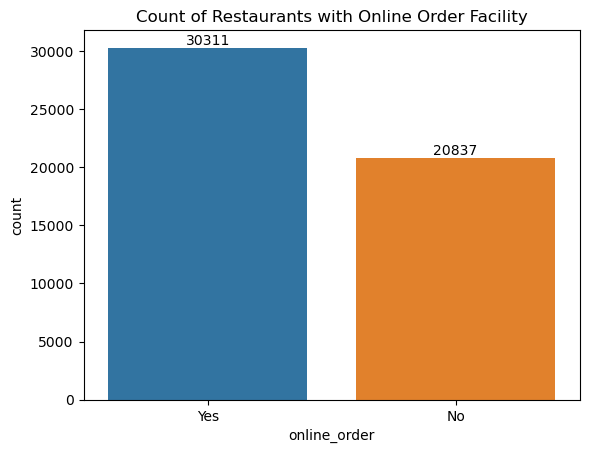

In [75]:
fig = sns.countplot(x = 'online_order', data = data)
for i in fig.containers:
    fig.bar_label(i)
plt.title("Count of Restaurants with Online Order Facility")
plt.show()

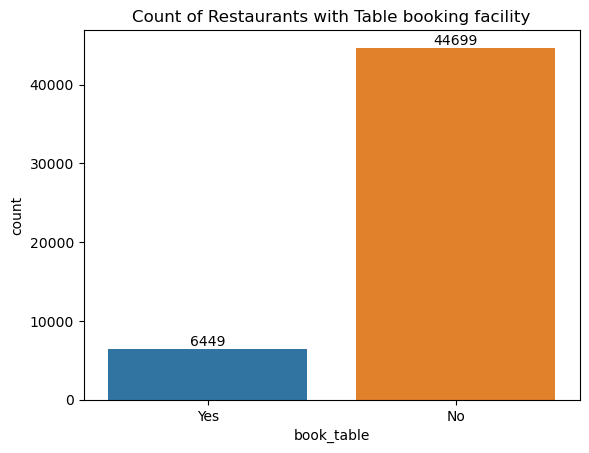

In [76]:
fig = sns.countplot(x = 'book_table', data = data)
for i in fig.containers:
    fig.bar_label(i)
plt.title("Count of Restaurants with Table booking facility")
plt.show()

#### Visualising Listed Restaurant type counts

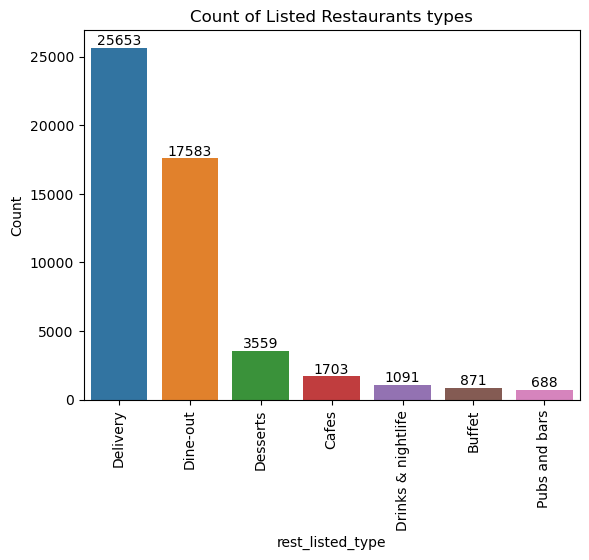

In [77]:
df1 = data.groupby('rest_listed_type',as_index=False).size().sort_values(by = 'size', ascending = False)
ax = sns.barplot(y = 'size', x = 'rest_listed_type', data = df1)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')
plt.ylabel(ylabel='Count')
plt.title("Count of Listed Restaurants types")
plt.show()

In [78]:
data.nunique()

url                 51148
address             11394
name                 8723
online_order            2
book_table              2
rate                   65
votes                2326
location               93
rest_type              93
dish_liked           5242
cuisines             2704
cost_for_2             70
reviews_list        22324
rest_listed_type        7
rest_city              30
dtype: int64

#### Finding out average cost for each listed Restraunt type

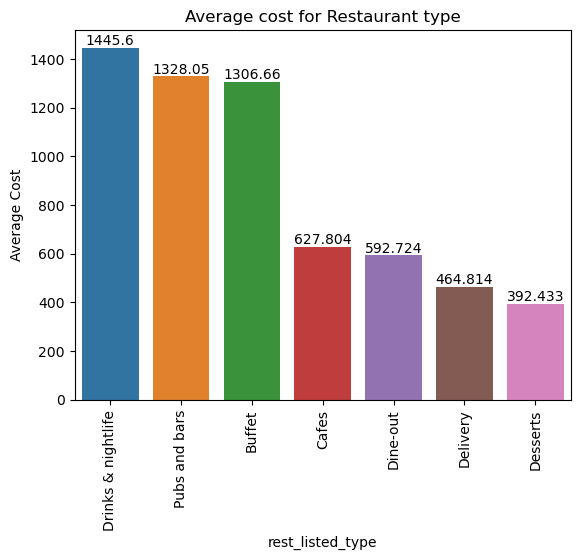

In [79]:
## Converting data type from oobject to float

data.cost_for_2 = data.cost_for_2.str.replace(',','').astype(float)

df2 = data.groupby('rest_listed_type', as_index=False)['cost_for_2'].mean().sort_values(by = 'cost_for_2', ascending = False)
ax = sns.barplot(x = 'rest_listed_type', y = 'cost_for_2', data = df2)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel(ylabel='Average Cost')
plt.xticks(fontsize = 10, rotation = 'vertical')
plt.title("Average cost for Restaurant type")
plt.show()

* **From above we can see Restaurant type of Drinks and Pub Bars are costing maximum followed by Buffet type restaurants**

#### Plotting Area/Location wise Restaurant Count

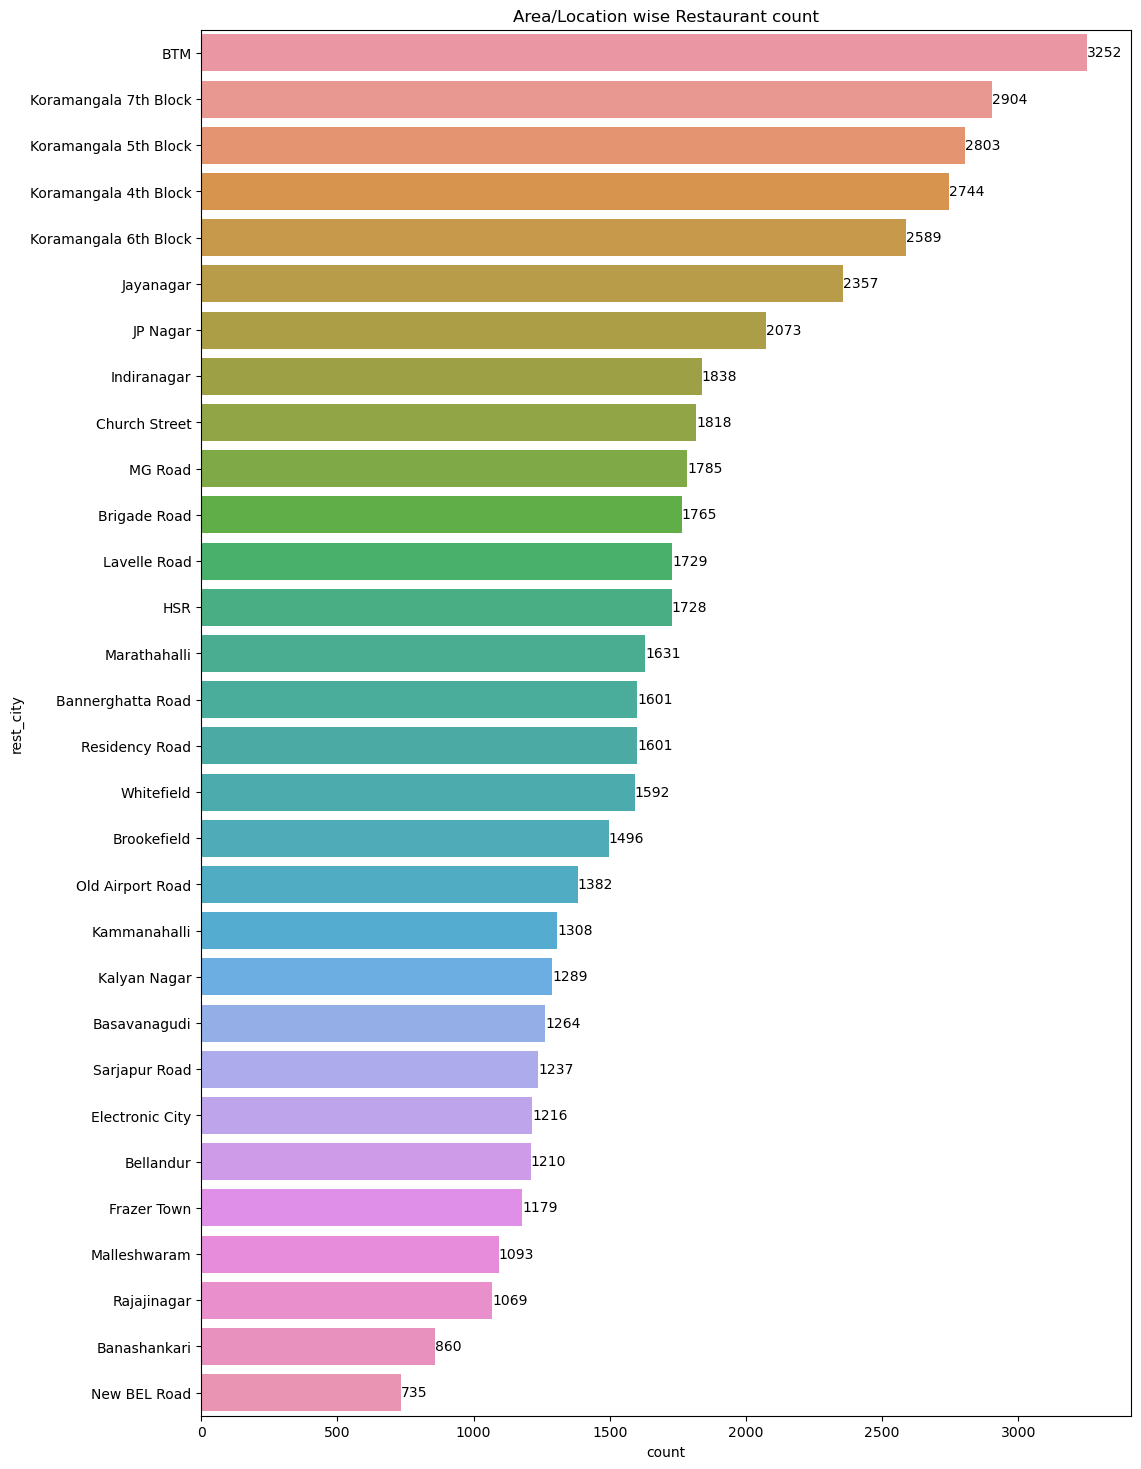

In [82]:
plt.figure(figsize=(12,18))
df3 = data.groupby('rest_city', as_index=False).size().sort_values(by = 'size', ascending = False)
ax = sns.barplot(x = 'size', y = 'rest_city', data = df3)
for i in ax.containers:
    ax.bar_label(i)

plt.xlabel(xlabel='count')
plt.title('Area/Location wise Restaurant count')
plt.show()

#### Performing Analysis on Rating variables

In [109]:
# Excluding unknown rating records and assigning in new dataframe

data_rating = data.loc[(data.rate != 'unknown')].reset_index().drop(columns = 'index')

# Convering datatype for Rate variable
data_rating['rate'] = data_rating['rate'].astype(float)
data_rating.rate

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
41258    3.7
41259    2.5
41260    3.6
41261    4.3
41262    3.4
Name: rate, Length: 41263, dtype: float64

#### Finding out the average rating across all restaurants in Bengaluru

In [113]:
round(data_rating.rate.mean(),1)

3.7

In [119]:
data_rating[data_rating.rate == data_rating.rate.max()]

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_for_2,reviews_list,rest_listed_type,rest_city
3172,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...",Delivery,Bellandur
3825,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...",Dine-out,Bellandur
3936,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...",Drinks & nightlife,Bellandur
4132,https://www.zomato.com/bangalore/belgian-waffl...,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,"[('Rated 3.0', ""RATED\n Waffles are totally w...",Delivery,Brigade Road
4659,https://www.zomato.com/bangalore/belgian-waffl...,"65, Markham Road, Ashok Nagar, Brigade Road, B...",Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400,"[('Rated 3.0', ""RATED\n Waffles are totally w...",Desserts,Brigade Road
5450,https://www.zomato.com/bangalore/flechazo-whit...,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,No,Yes,4.9,2745,Whitefield,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ","1,400","[('Rated 5.0', 'RATED\n Food quality is amazi...",Buffet,Brookefield
5774,https://www.zomato.com/bangalore/punjab-grill-...,"Ground Floor, Forum Shantiniketan, Whitefield ...",Punjab Grill,Yes,No,4.9,518,Whitefield,Casual Dining,"Kadai Paneer, Kulfi, Kadhai Paneer, Dahi Kebab...",North Indian,"2,000","[('Rated 5.0', 'RATED\n The food is great...t...",Delivery,Brookefield
6318,https://www.zomato.com/bangalore/flechazo-whit...,"120 A3, 2nd Floor, Santosh Tower, EPIP Industr...",Flechazo,No,Yes,4.9,2745,Whitefield,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ","1,400","[('Rated 5.0', 'RATED\n Food quality is amazi...",Dine-out,Brookefield
6585,https://www.zomato.com/bangalore/abs-absolute-...,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 5.0', 'RATED\n We liked the place a ...",Buffet,BTM
6599,https://www.zomato.com/bangalore/asia-kitchen-...,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,Yes,Yes,4.9,2178,Koramangala 5th Block,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos","1,500","[('Rated 5.0', ""RATED\n This is not just one ...",Buffet,BTM


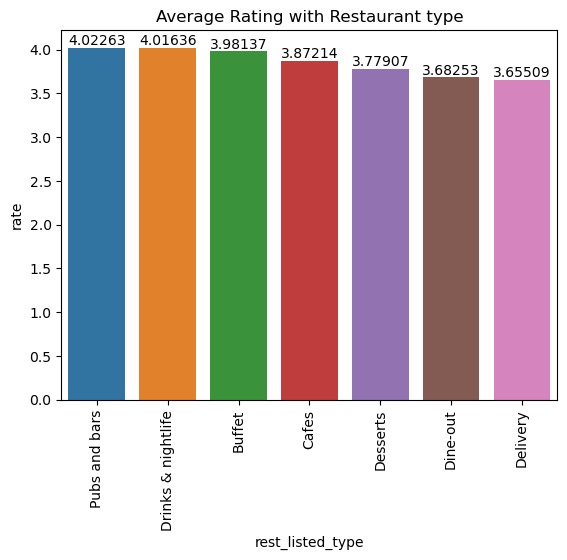

In [130]:
df4 = data_rating.groupby('rest_listed_type', as_index=False)['rate'].mean().sort_values(by = 'rate', ascending = False)
ax = sns.barplot(x = 'rest_listed_type', y = 'rate', data = df4)
for i in ax.containers:
    ax.bar_label(i)

plt.title('Average Rating with Restaurant type')
plt.xticks(fontsize = 10, rotation = 'vertical')
plt.show()

* **From above chart we can see that Pubs and Drinking Bars are having maximum average rating followed by Buffet type**

#### Plotting the relation between Rating and Number of votes


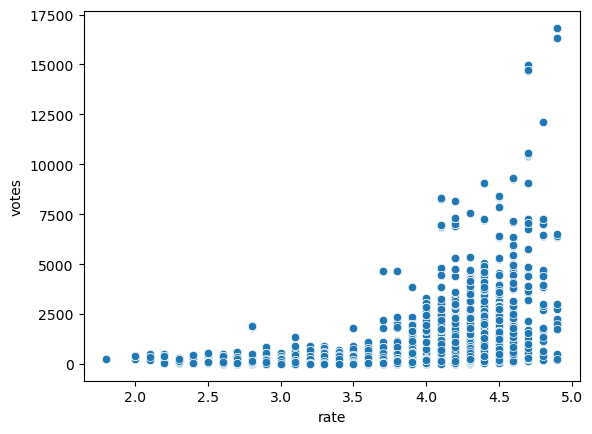

In [133]:
sns.scatterplot(x = 'rate', y = 'votes', data = data_rating )
plt.show()

In [134]:
data_rating[['votes','rate']].corr()

,votes,rate
votes,1.000000,0.435256
rate,0.435256,1.000000


* **From above scatterplot we can see that both Rating and Number of voting are positively corelated to each other with corelation const of 0.43**